In [1]:
# before you run this code ,you only need to upload a.csv file from the left list in the google colab interface
#read file
import pandas as pd
df = pd.read_csv('./a.csv')
city_x=df.x #  citys'x axes 
city_y= df.y  # citys' y axes

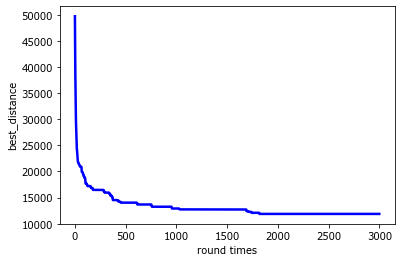

11873.0


In [100]:
import math
import random
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys
from numpy.matlib import rand
from matplotlib.artist import getp
import copy

#the number of cities
n = 48
#inital a 48*48 matrix for distance between every two cities
distance = [[0 for col in range(n)] for raw in range(n)]

# initial  a tabu list to save the path which has been searched
tabu_list = []
#inital a list to record if the tabu list is full or size has reached maximum capacity
tabu_time = []
#set a count ro record the number of path which has been restricted
current_tabu_num = 0
#tabu length
tabu_limit = 7
neighbor_number =50;
#inital a candidate matrix
candidate = [[0 for col in range(n)] for raw in range(neighbor_number)]
candidate_distance = [0 for col in range(neighbor_number)]
#inital best path ,best distance,current distance and current path
best_route = []
best_distance = sys.maxsize
current_route = []
current_distance = 0.0

#Generate a matrix randomly which is 48*1 to product a disordered path from 1 to 48
def greedy():
    g=[0]*48
    vis = [0]*48
    for i in range(48):
        vis[i]=0
    on= 0
    while on<48:
        te = random.randint(0,47)
        if(vis[te]==0):
            vis[te]=1
            g[on]=te
            on=on+1
    return g

#Calculate distance based on pseudo-Euclidean distance
def getdistance():
    for i in range(n):
        for j in range(n):
            x = pow(city_x[i] - city_x[j], 2)
            y = pow(city_y[i] - city_y[j], 2)
            z=(x+y)/10.0
            distance[i][j] = math.ceil(pow(z, 0.5))
    for i in range(n):
        for j in range(n):
            if distance[i][j] == 0:
                distance[i][j] = sys.maxsize
                
#calculate the total distances for every path,or calculate the fitness value
def cacl_best(rou):
    sumdis = 0.0
    for i in range(n-1):
        sumdis += distance[rou[i]][rou[i+1]] # calculate total distance from the first city to the last city
    sumdis += distance[rou[n-1]][rou[0]]     # add the distance of head and teil cities
    return sumdis
 
#inital set for tabu
def setup():
    global current_distance
    global current_route
    global tabu_list
    #get initial solution and assign initial solution to best solution('path' equal to 'solution') 
    current_route = greedy()
    best_route = copy.copy(current_route)
    #update inner varible
    current_distance = cacl_best(current_route)
    best_distance = current_distance
    
    #initial tabu_list and tabu_time
    tabu_list.clear()
    tabu_time.clear()
    current_tabu_num = 0
     
    
#choose tow city from this path
# then exchange their position to get a new path 
def exchange(index1, index2, arr):
    current_list = copy.copy(arr)
    current = current_list[index1]
    current_list[index1] = current_list[index2]
    current_list[index2] = current
    return current_list
    
    
#get candidate solutions
def get_candidate():
    global best_route
    global best_distance
    global current_tabu_num
    global current_distance
    global current_route
    global tabu_list
    #save the position which has been exchanged
    exchange_position = []
    #set a count to save the number of candidate
    temp = 0
    #select candidate solution randomly
    while True:
        current = random.sample(range(0, n), 2)   # current is a 1*2 metrix to save two cities
        if current not in exchange_position:      #if this two cities' position have not do an operate for exchanging 
            exchange_position.append(current)      # record position
            candidate[temp] = exchange(current[0], current[1], current_route)  # get a cadidate solution
            if candidate[temp] not in tabu_list:          # if this candidate has not been limited
                candidate_distance[temp] = cacl_best(candidate[temp]) #replace it
                temp += 1
            if temp >= neighbor_number:      #if the number of candidate solutions reach the limit                  
                break            # stop the loop
            
    
    #get the best solution and index from candidate solutions
    candidate_best = min(candidate_distance)
    best_index = candidate_distance.index(candidate_best)
    
    
    current_distance = candidate_best
    current_route = copy.copy(candidate[best_index])
    
    #compare current solution and best solution,if current solution is less than best distance, make best solution become current solution
    if current_distance < best_distance :
        best_distance = current_distance
        best_route = copy.copy(current_route)
    
    #add this best solution to tabu list 
    tabu_list.append(candidate[best_index])
    #count the term of tabu
    tabu_time.append(tabu_limit)
    #the number of path which has been limited
    current_tabu_num += 1    
    
#update tabu list and tabu time
def update_tabu():
    global current_tabu_num
    global tabu_time
    global tabu_list
    
    # set a varible ,which is used to delete every tabu term in the list tabu_time 
    del_num = 0
    temp = [0 for col in range(n)]
    #update the term
    tabu_time = [x-1 for x in tabu_time]
    #if the term is 0, that means the tabu list is full, so we need to clean the data of this element 
    for i in range(current_tabu_num):
        if tabu_time[i] == 0:
            del_num += 1
            tabu_list[i] = temp
           
    current_tabu_num -= del_num 
    #free a position 
    while 0 in tabu_time:
        tabu_time.remove(0)
    #free a position
    while temp in tabu_list:
        tabu_list.remove(temp)  

#draw a city route map for TSP
def draw():
    result_x = [0 for col in range(n+1)]
    result_y = [0 for col in range(n+1)]
    
    for i in range(n):
        result_x[i] = city_x[best_route[i]]
        result_y[i] = city_y[best_route[i]]
    result_x[n] = result_x[0]
    result_y[n] = result_y[0]
    plt.plot(result_x, result_y, marker='>', mec='r', mfc='w',label=u'Route')
    plt.legend()  
    plt.margins(0)
    plt.subplots_adjust(bottom=0.15)
    plt.xlabel(u"x") #Xlabel
    plt.ylabel(u"y") #Ylabel
    plt.title("TSP Solution") #title
    plt.show()
    plt.close(0)
    
# product a graph to analysis the relationship between the number of iteration and every best distance
y_50 = np.zeros([3000], dtype = int)
def analysis():
    global y_50
    getdistance()
    setup()
    total_distance=0
    x = np.zeros([3000], dtype = int)
    y = np.zeros([3000], dtype = int)
    for rt in range(3000): 
        get_candidate()
        update_tabu()
        total_distance=total_distance+current_distance
        x[rt]=rt
        y[rt] = best_distance
    plt.plot(x,y,color="blue",linewidth=2.5, linestyle="-")
    plt.xlabel(u"round times") #Xlabel
    plt.ylabel(u"best_distance") #Ylabel
    plt.show()
    y_50 =y
    print(best_distance)
    
def solve():
    #global avg_distance
    getdistance()
    setup()
    total_distance=0
    x = np.zeros([3000], dtype = int)
    y = np.zeros([3000], dtype = int)
    for rt in range(3000): 
        get_candidate()
        update_tabu()
        total_distance=total_distance+current_distance
       # print(current_distance)
    #print("avg_distance is")    
    #avg_distance=total_distance/3000
    #print(avg_distance)
    #print("current distance is：")
    #print(current_distance)
    #print(current_route)
    print("best route is")  
   # print(best_route)
    print(best_distance)
    #draw()  
    
analysis()


In [91]:
y_200

array([44185, 41064, 36655, ..., 11974, 11974, 11974])

In [93]:
y_150

array([39613, 37097, 35787, ..., 12779, 12779, 12779])

In [95]:
y_100

array([41579, 39604, 35917, ..., 11762, 11762, 11762])

In [19]:
y_40

array([43903, 41009, 38244, ..., 12196, 12196, 12196])

In [35]:
x_40

array([   0,    1,    2, ..., 2997, 2998, 2999])

No handles with labels found to put in legend.


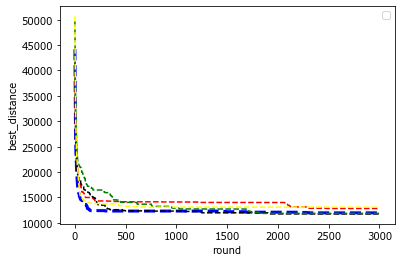

In [101]:

plt.plot(x_40,y_200,color="blue",linewidth=3, linestyle="--")
plt.plot(x_40,y_150,color="red",linewidth=1.5, linestyle="--")
plt.plot(x_40,y_100,color="black",linewidth=1.5, linestyle="--")
plt.plot(x_40,y_50,color="green",linewidth=1.5, linestyle="--")
plt.plot(x_40,y_250,color="yellow",linewidth=1.5, linestyle="--")
plt.xlabel('round')
plt.ylabel('best_distance') 
plt.legend()#
plt.show()#